In [1]:
import numpy as np
from scipy.sparse.linalg import *
from scipy.constants import *
from matplotlib import pyplot as plt
from QCircuit import *
%matplotlib inline

In [2]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJ1'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJ2'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJ3'), ['2', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJ4'), ['3', '4'])
FQ3JJ.add_element(QCapacitance('C1'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('C2'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('C3'), ['2', '3'])
FQ3JJ.add_element(QCapacitance('C4'), ['3', '4'])
        
phi1 = QVariable('φ1')
phi2 = QVariable('φ2')
phi3 = QVariable('φ3')
phix = QVariable('φx')
phi1.create_grid(16, 1)
phi2.create_grid(16, 1)
phi3.create_grid(16, 1)
FQ3JJ.add_variable(phi1)
FQ3JJ.add_variable(phi2)
FQ3JJ.add_variable(phi3)
FQ3JJ.add_variable(phix)
FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4'], 
                       ['φ1', 'φ2', 'φ3', 'φx'], 
                       np.asarray([[0,0,0,0],[1,0,0,0],[1,1,0,0],[1,1,1,0],[0,0,0,1]]))

flux_steps = 65
energies = np.zeros((flux_steps,10), dtype=np.complex128)

Ej = 50e9
Ec = 10e9
alpha = 0.43
FQ3JJ.find_element('JJ1').set_critical_current(Ej)
FQ3JJ.find_element('JJ2').set_critical_current(Ej)
FQ3JJ.find_element('JJ3').set_critical_current(Ej)
FQ3JJ.find_element('C1').set_capacitance(1/Ec)
FQ3JJ.find_element('C2').set_capacitance(1/Ec)
FQ3JJ.find_element('C3').set_capacitance(1/Ec)
FQ3JJ.find_element('JJ4').set_critical_current(Ej*alpha)
FQ3JJ.find_element('C4').set_capacitance(alpha/Ec)
for qubit_flux_id, qubit_flux in enumerate(np.linspace(0, np.pi, flux_steps)):
    #print('EjEc_ratio id: {0: 2d}/{1: 2d}, alpha id: {2: 2d}/{3: 2d}, flux id: {4: 2d}/{5: 2d}'.format(
    #        EjEc_ratio_id, EjEc_ratio_steps, alpha_id, alpha_steps, qubit_flux_id, flux_steps))
    phix.set_parameter(qubit_flux, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=10)
    energies[qubit_flux_id, :] = eigenenergies
    print (qubit_flux, eigenenergies[1]-eigenenergies[0])

0.0 (20924539161.2+2.82558759871e-06j)
0.0490873852123 (20922667275.9+1.84752055592e-06j)
0.0981747704247 (20917049825.2+1.99277440618e-06j)
0.147262155637 (20907681415.6+4.75687407783e-07j)
0.196349540849 (20894553024.8+2.59051220303e-06j)
0.245436926062 (20877651952.4-9.45910334277e-07j)
0.294524311274 (20856961749.3+1.29477561692e-06j)
0.343611696486 (20832462126-4.83061638184e-07j)
0.392699081699 (20804128838.1+6.16649274046e-08j)
0.441786466911 (20771933547.6-2.42168996178e-06j)
0.490873852123 (20735843658.9-1.68233278017e-06j)
0.539961237336 (20695822126.5-1.82817780203e-06j)
0.589048622548 (20651827232.7+1.25878642127e-06j)
0.63813600776 (20603812331.6+1.2342959791e-06j)
0.687223392973 (20551725557.1+9.0375886223e-07j)
0.736310778185 (20495509488.9-6.27884048368e-06j)
0.785398163397 (20435100773.7+3.11917259592e-07j)
0.83448554861 (20370429694.4+2.89959157733e-07j)
0.883572933822 (20301419681.5+2.80396852827e-06j)
0.932660319034 (20227986758+5.01510499671e-06j)
0.981747704247 (2

C:\Users\ilia\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.3, 0.5)

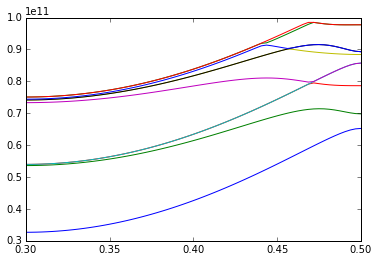

In [3]:
%matplotlib inline
plt.plot(np.linspace(0.3, 0.5, flux_steps), energies)
plt.xlim([0.3, 0.5])

C:\Users\ilia\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.3, 0.5)

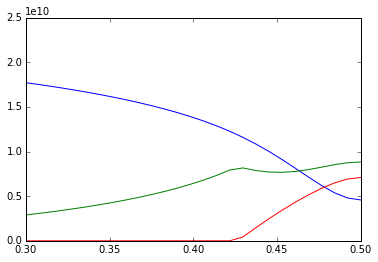

In [35]:
plt.plot(np.linspace(0, 0.5, flux_steps), energies[:,1]-energies[:,0])
plt.plot(np.linspace(0, 0.5, flux_steps), energies[:,2]-energies[:,1])
plt.plot(np.linspace(0, 0.5, flux_steps), energies[:,3]-energies[:,2])
plt.xlim([0.3, 0.5])